In [ ]:
from __future__ import annotations

import json

import nltk

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from scipy import stats

In [ ]:
dataset = pd.read_csv("aggregated.csv", index_col=0, converters={"Document": json.loads})
dataset

,ID,Issue,Stance,Argument,CO,LA,LR,LS,EF,CR,...,AP,AR,RE,GA,GR,GS,OV,Document,Plain Words,Fancy Words
0,1191878965,is porn wrong,yes porn is wrong,hells yeah porn is wrong. i mean wtf. film nak...,2,1,3,2,2,1,...,1,2,1,1,2,1,1,"[[{'id': 1, 'text': 'hells', 'lemma': 'hell', ...","[{\n ""id"": 1,\n ""text"": ""hells"",\n ""lemma"":...","[{\n ""id"": 1,\n ""text"": ""hells"",\n ""lemma"":..."
1,12365,firefox vs internet explorer,there s more browsers than the ie firefox is a...,(I am writing this through Firefox) Emotions a...,1,2,3,1,1,2,...,2,2,2,2,1,1,2,"[[{'id': 1, 'text': '(', 'lemma': '(', 'upos':...","[{\n ""id"": 1,\n ""text"": ""("",\n ""lemma"": ""(""...","[{\n ""id"": 1,\n ""text"": ""("",\n ""lemma"": ""(""..."
2,12367,firefox vs internet explorer,there s more browsers than the ie firefox is a...,Firefox (and the extensions) leaks memory like...,1,2,3,1,1,2,...,2,2,2,2,2,1,1,"[[{'id': 1, 'text': 'Firefox', 'lemma': 'Firef...","[{\n ""id"": 1,\n ""text"": ""Firefox"",\n ""lemma...","['PRODUCT', {\n ""id"": 2,\n ""text"": ""("",\n ""..."
3,12371,firefox vs internet explorer,there s more browsers than the ie firefox is a...,"I was a IE user from the beginning, but recent...",1,2,3,1,1,1,...,2,2,1,2,2,1,1,"[[{'id': 1, 'text': 'I', 'lemma': 'I', 'upos':...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""..."
4,12380,firefox vs internet explorer,there s more browsers than the ie firefox is a...,I'm not an IE user but FFX has a lot of issues...,2,2,3,2,1,2,...,2,1,2,2,2,1,1,"[[{'id': 1, 'text': 'I', 'lemma': 'I', 'upos':...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,arg636360,christianity or atheism,christianity,One of the key component to Christianity is FA...,1,2,3,1,1,1,...,3,2,1,1,3,1,1,"[[{'id': 1, 'text': 'One', 'lemma': 'one', 'up...","[{\n ""id"": 1,\n ""text"": ""One"",\n ""lemma"": ""...","['CARDINAL', {\n ""id"": 2,\n ""text"": ""of"",\n ..."
299,arg644073,christianity or atheism,christianity,Christianity does offer hope in the world. Chr...,1,2,2,1,1,1,...,2,1,1,2,2,1,1,"[[{'id': 1, 'text': 'Christianity', 'lemma': '...","[{\n ""id"": 1,\n ""text"": ""Christianity"",\n ""...","['NORP', {\n ""id"": 2,\n ""text"": ""does"",\n ""..."
300,arg649666,india has the potential to lead the world,no against,India has Strong Military Neighbors (China & P...,1,2,2,2,1,2,...,2,1,1,2,2,1,1,"[[{'id': 1, 'text': 'India', 'lemma': 'India',...","[{\n ""id"": 1,\n ""text"": ""India"",\n ""lemma"":...","['GPE', {\n ""id"": 2,\n ""text"": ""has"",\n ""le..."
301,arg660921,is the school uniform a good or bad idea,good,"yas,of course . School uniform is important 1....",1,1,2,1,1,1,...,1,1,1,1,2,1,1,"[[{'id': 1, 'text': 'yas', 'lemma': 'yas', 'up...","[{\n ""id"": 1,\n ""text"": ""yas"",\n ""lemma"": ""...","[{\n ""id"": 1,\n ""text"": ""yas"",\n ""lemma"": ""..."


In [ ]:
def get_pos_list(document: dict) -> list[str]:
    return [word["upos"] for sentence in document for word in sentence]

In [ ]:
dataset["POS"] = dataset["Document"].apply(get_pos_list)
dataset = dataset.drop(columns=["ID", "Issue", "Stance", "Argument", "Document", "Plain Words", "Fancy Words"])

dataset

,CO,LA,LR,LS,EF,CR,EM,CL,AP,AR,RE,GA,GR,GS,OV,POS
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[NOUN, INTJ, NOUN, AUX, ADJ, PUNCT, PRON, VERB..."
1,1,2,3,1,1,2,2,3,2,2,2,2,1,1,2,"[PUNCT, PRON, AUX, VERB, PRON, ADP, PROPN, PUN..."
2,1,2,3,1,1,2,2,2,2,2,2,2,2,1,1,"[PROPN, PUNCT, CCONJ, DET, NOUN, PUNCT, VERB, ..."
3,1,2,3,1,1,1,1,2,2,2,1,2,2,1,1,"[PRON, AUX, DET, PROPN, NOUN, ADP, DET, NOUN, ..."
4,2,2,3,2,1,2,2,1,2,1,2,2,2,1,1,"[PRON, AUX, PART, DET, PROPN, NOUN, CCONJ, PRO..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1,2,3,1,1,1,1,2,3,2,1,1,3,1,1,"[NUM, ADP, DET, ADJ, NOUN, ADP, PROPN, AUX, PR..."
299,1,2,2,1,1,1,3,2,2,1,1,2,2,1,1,"[PROPN, AUX, VERB, NOUN, ADP, DET, NOUN, PUNCT..."
300,1,2,2,2,1,2,2,2,2,1,1,2,2,1,1,"[PROPN, VERB, ADJ, ADJ, PROPN, PUNCT, PROPN, C..."
301,1,1,2,1,1,1,2,1,1,1,1,1,2,1,1,"[PROPN, PUNCT, ADP, NOUN, PUNCT, NOUN, NOUN, A..."


## Unigram Analysis (assuming CO)

In [ ]:
dist = dataset[["CO", "POS"]].explode("POS").groupby("CO").value_counts(normalize=True).unstack()
dist

POS,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,X
CO,,,,,,,,,,,,,,,,,
1,0.068751,0.075711,0.053608,0.084015,0.029430,0.071804,0.002320,0.166687,0.006961,0.043351,0.111003,0.025400,0.101111,0.028819,0.002809,0.125901,0.002320
2,0.070238,0.076642,0.062004,0.083350,0.033238,0.075930,0.003253,0.162635,0.010266,0.039845,0.111100,0.020228,0.090669,0.031917,0.002541,0.125534,0.000610
3,0.076782,0.076322,0.054713,0.086437,0.030805,0.074483,0.005057,0.182529,0.004598,0.035862,0.102069,0.012414,0.103908,0.031724,0.001839,0.118621,0.001839


<Axes: xlabel='POS'>

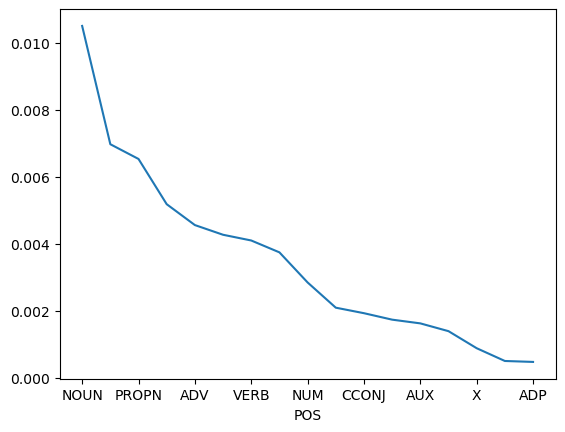

In [ ]:
dist.std(axis=0).sort_values(ascending=False).plot()

## Bigram Analysis (assuming CO)

```
This is a simple sentence .

this is
is a
a simple
simple sentence
sentence .
```

In [ ]:
bigram = dataset[["CO", "POS"]].apply(lambda x: {"CO": x[0], "Bigram": list(nltk.bigrams(x[1]))}, axis=1, result_type="expand")
bigram

,CO,Bigram
0,2,"[(NOUN, INTJ), (INTJ, NOUN), (NOUN, AUX), (AUX..."
1,1,"[(PUNCT, PRON), (PRON, AUX), (AUX, VERB), (VER..."
2,1,"[(PROPN, PUNCT), (PUNCT, CCONJ), (CCONJ, DET),..."
3,1,"[(PRON, AUX), (AUX, DET), (DET, PROPN), (PROPN..."
4,2,"[(PRON, AUX), (AUX, PART), (PART, DET), (DET, ..."
...,...,...
298,1,"[(NUM, ADP), (ADP, DET), (DET, ADJ), (ADJ, NOU..."
299,1,"[(PROPN, AUX), (AUX, VERB), (VERB, NOUN), (NOU..."
300,1,"[(PROPN, VERB), (VERB, ADJ), (ADJ, ADJ), (ADJ,..."
301,1,"[(PROPN, PUNCT), (PUNCT, ADP), (ADP, NOUN), (N..."


In [ ]:
dist = bigram.explode("Bigram").groupby("CO").value_counts(normalize=True).unstack().fillna(0)
dist

Bigram,"(ADJ, ADJ)","(ADJ, ADP)","(ADJ, ADV)","(ADJ, AUX)","(ADJ, CCONJ)","(ADJ, DET)","(ADJ, NOUN)","(ADJ, NUM)","(ADJ, PART)","(ADJ, PRON)",...,"(VERB, PUNCT)","(VERB, SCONJ)","(VERB, SYM)","(VERB, VERB)","(VERB, X)","(X, ADJ)","(X, ADP)","(X, NOUN)","(X, PUNCT)","(X, X)"
CO,,,,,,,,,,,,,,,,,,,,,
1,0.002612,0.007836,0.001368,0.000995,0.002985,0.000249,0.035323,0.000249,0.002861,0.000622,...,0.011070,0.005721,0.000124,0.002488,0.000000,0.000000,0.000124,0.000000,0.000249,0.001741
2,0.002060,0.006181,0.001545,0.000103,0.004533,0.000412,0.033584,0.000515,0.003812,0.001545,...,0.006696,0.007314,0.000103,0.002163,0.000103,0.000000,0.000103,0.000103,0.000000,0.000000
3,0.002323,0.005576,0.001859,0.002323,0.003717,0.000000,0.039498,0.000000,0.002788,0.000000,...,0.005576,0.004647,0.000000,0.001859,0.000000,0.000465,0.000000,0.000000,0.000465,0.000000


<Axes: xlabel='Bigram'>

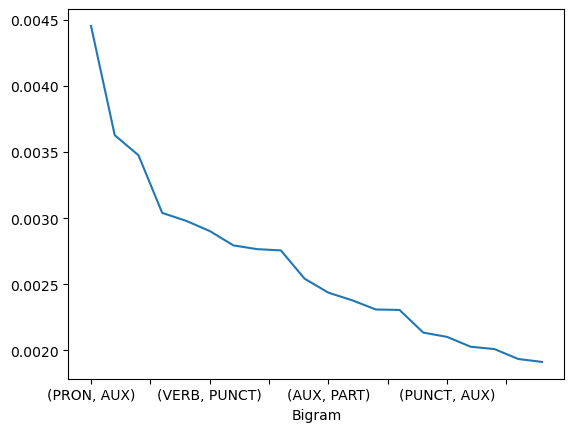

In [ ]:
dist.std(axis=0).sort_values(ascending=False).iloc[:20].plot()

$$
P\left(\text{CO} = \left\{1, 2, 3\right\} \mid \text{PRON}, \text{AUX}\right)
$$

In [ ]:
dist.loc[3].sort_values(ascending=False)

Bigram
(NOUN, PUNCT)    0.051115
(DET, NOUN)      0.048792
(ADJ, NOUN)      0.039498
(NOUN, ADP)      0.031599
(PRON, AUX)      0.030204
                   ...   
(INTJ, SCONJ)    0.000000
(NUM, CCONJ)     0.000000
(NUM, DET)       0.000000
(NUM, NUM)       0.000000
(X, X)           0.000000
Name: 3, Length: 235, dtype: float64

In [ ]:
dist.loc[1].sort_values(ascending=False)

Bigram
(DET, NOUN)      0.048259
(NOUN, PUNCT)    0.045771
(PRON, AUX)      0.035572
(ADJ, NOUN)      0.035323
(PART, VERB)     0.030100
                   ...   
(CCONJ, INTJ)    0.000000
(SYM, ADJ)       0.000000
(PROPN, DET)     0.000000
(NOUN, X)        0.000000
(NUM, VERB)      0.000000
Name: 1, Length: 235, dtype: float64

## Trigram Analysis (assuming CO)

In [ ]:
trigram = dataset[["CO", "POS"]].apply(lambda x: {"CO": x[0], "Bigram": list(nltk.trigrams(x[1]))}, axis=1, result_type="expand")
trigram

,CO,Bigram
0,2,"[(NOUN, INTJ, NOUN), (INTJ, NOUN, AUX), (NOUN,..."
1,1,"[(PUNCT, PRON, AUX), (PRON, AUX, VERB), (AUX, ..."
2,1,"[(PROPN, PUNCT, CCONJ), (PUNCT, CCONJ, DET), (..."
3,1,"[(PRON, AUX, DET), (AUX, DET, PROPN), (DET, PR..."
4,2,"[(PRON, AUX, PART), (AUX, PART, DET), (PART, D..."
...,...,...
298,1,"[(NUM, ADP, DET), (ADP, DET, ADJ), (DET, ADJ, ..."
299,1,"[(PROPN, AUX, VERB), (AUX, VERB, NOUN), (VERB,..."
300,1,"[(PROPN, VERB, ADJ), (VERB, ADJ, ADJ), (ADJ, A..."
301,1,"[(PROPN, PUNCT, ADP), (PUNCT, ADP, NOUN), (ADP..."


In [ ]:
dist = trigram.explode("Bigram").groupby("CO").value_counts(normalize=True).unstack().fillna(0)
dist

Bigram,"(ADJ, ADJ, ADJ)","(ADJ, ADJ, ADP)","(ADJ, ADJ, ADV)","(ADJ, ADJ, CCONJ)","(ADJ, ADJ, DET)","(ADJ, ADJ, NOUN)","(ADJ, ADJ, PRON)","(ADJ, ADJ, PROPN)","(ADJ, ADJ, PUNCT)","(ADJ, ADP, ADJ)",...,"(VERB, X, ADP)","(X, ADJ, NOUN)","(X, ADP, ADJ)","(X, ADP, X)","(X, NOUN, PUNCT)","(X, PUNCT, SCONJ)","(X, PUNCT, X)","(X, X, ADP)","(X, X, PUNCT)","(X, X, X)"
CO,,,,,,,,,,,,,,,,,,,,,
1,0.000253,0.00000,0.000000,0.000000,0.000000,0.002281,0.000000,0.000127,0.000000,0.000760,...,0.000000,0.00000,0.000000,0.000127,0.000000,0.000127,0.000127,0.000127,0.000253,0.001394
2,0.000104,0.00000,0.000104,0.000209,0.000104,0.001358,0.000104,0.000000,0.000104,0.000418,...,0.000104,0.00000,0.000104,0.000000,0.000104,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00047,0.000000,0.000000,0.000000,0.001409,0.000000,0.000000,0.000470,0.001879,...,0.000000,0.00047,0.000000,0.000000,0.000000,0.000000,0.000470,0.000000,0.000000,0.000000


<Axes: xlabel='Bigram'>

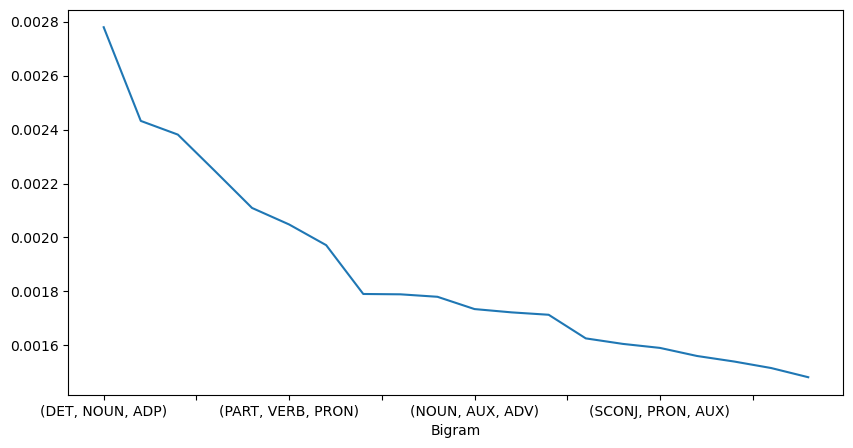

In [ ]:
dist.std(axis=0).sort_values(ascending=False).iloc[:20].plot(figsize=(10, 5))

## PP : )

In [ ]:
dataset = pd.read_csv("aggregated.csv", index_col=0, converters={"Document": json.loads})
dataset

,ID,Issue,Stance,Argument,CO,LA,LR,LS,EF,CR,...,AP,AR,RE,GA,GR,GS,OV,Document,Plain Words,Fancy Words
0,1191878965,is porn wrong,yes porn is wrong,hells yeah porn is wrong. i mean wtf. film nak...,2,1,3,2,2,1,...,1,2,1,1,2,1,1,"[[{'id': 1, 'text': 'hells', 'lemma': 'hell', ...","[{\n ""id"": 1,\n ""text"": ""hells"",\n ""lemma"":...","[{\n ""id"": 1,\n ""text"": ""hells"",\n ""lemma"":..."
1,12365,firefox vs internet explorer,there s more browsers than the ie firefox is a...,(I am writing this through Firefox) Emotions a...,1,2,3,1,1,2,...,2,2,2,2,1,1,2,"[[{'id': 1, 'text': '(', 'lemma': '(', 'upos':...","[{\n ""id"": 1,\n ""text"": ""("",\n ""lemma"": ""(""...","[{\n ""id"": 1,\n ""text"": ""("",\n ""lemma"": ""(""..."
2,12367,firefox vs internet explorer,there s more browsers than the ie firefox is a...,Firefox (and the extensions) leaks memory like...,1,2,3,1,1,2,...,2,2,2,2,2,1,1,"[[{'id': 1, 'text': 'Firefox', 'lemma': 'Firef...","[{\n ""id"": 1,\n ""text"": ""Firefox"",\n ""lemma...","['PRODUCT', {\n ""id"": 2,\n ""text"": ""("",\n ""..."
3,12371,firefox vs internet explorer,there s more browsers than the ie firefox is a...,"I was a IE user from the beginning, but recent...",1,2,3,1,1,1,...,2,2,1,2,2,1,1,"[[{'id': 1, 'text': 'I', 'lemma': 'I', 'upos':...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""..."
4,12380,firefox vs internet explorer,there s more browsers than the ie firefox is a...,I'm not an IE user but FFX has a lot of issues...,2,2,3,2,1,2,...,2,1,2,2,2,1,1,"[[{'id': 1, 'text': 'I', 'lemma': 'I', 'upos':...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""...","[{\n ""id"": 1,\n ""text"": ""I"",\n ""lemma"": ""I""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,arg636360,christianity or atheism,christianity,One of the key component to Christianity is FA...,1,2,3,1,1,1,...,3,2,1,1,3,1,1,"[[{'id': 1, 'text': 'One', 'lemma': 'one', 'up...","[{\n ""id"": 1,\n ""text"": ""One"",\n ""lemma"": ""...","['CARDINAL', {\n ""id"": 2,\n ""text"": ""of"",\n ..."
299,arg644073,christianity or atheism,christianity,Christianity does offer hope in the world. Chr...,1,2,2,1,1,1,...,2,1,1,2,2,1,1,"[[{'id': 1, 'text': 'Christianity', 'lemma': '...","[{\n ""id"": 1,\n ""text"": ""Christianity"",\n ""...","['NORP', {\n ""id"": 2,\n ""text"": ""does"",\n ""..."
300,arg649666,india has the potential to lead the world,no against,India has Strong Military Neighbors (China & P...,1,2,2,2,1,2,...,2,1,1,2,2,1,1,"[[{'id': 1, 'text': 'India', 'lemma': 'India',...","[{\n ""id"": 1,\n ""text"": ""India"",\n ""lemma"":...","['GPE', {\n ""id"": 2,\n ""text"": ""has"",\n ""le..."
301,arg660921,is the school uniform a good or bad idea,good,"yas,of course . School uniform is important 1....",1,1,2,1,1,1,...,1,1,1,1,2,1,1,"[[{'id': 1, 'text': 'yas', 'lemma': 'yas', 'up...","[{\n ""id"": 1,\n ""text"": ""yas"",\n ""lemma"": ""...","[{\n ""id"": 1,\n ""text"": ""yas"",\n ""lemma"": ""..."


In [ ]:
example = dataset.loc[10, "Document"][-1]

In [ ]:
def extract_dependency_parse(sentence: list[dict]) -> tuple[list[tuple[int, dict]], list[tuple[int, int, dict]]]:
    nodes, edges = [(0, {"text": "<ROOT>", "pos": "<ROOT>"})], []
    
    for word in sentence:
        nodes.append((word["id"], {"text": word["text"], "pos": word["upos"]}))
        edges.append((word["head"], word["id"], {"relation": word["deprel"]}))
        
    return nodes, edges

## POS-Based Pattern Mining

In [ ]:
import pyfpgrowth

In [ ]:
def to_pos_sequences(document: list[list[dict]]) -> list[list[str]]:
    return [[word["upos"] for word in sentence] for sentence in document]

In [ ]:
sequences = dataset.iloc[:, 4:4 + 15].join(dataset["Document"].apply(to_pos_sequences).rename("Sequence")).explode("Sequence")
sequences

,CO,LA,LR,LS,EF,CR,EM,CL,AP,AR,RE,GA,GR,GS,OV,Sequence
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[NOUN, INTJ, NOUN, AUX, ADJ, PUNCT]"
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[PRON, VERB, ADP, NOUN, ADJ, NOUN, PART, ADV, ..."
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[NOUN, AUX, ADV, ADV, SCONJ, PRON, VERB, ADV, ..."
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[SCONJ, PRON, AUX, PART, ADJ, ADV, VERB, VERB,..."
0,2,1,3,2,2,1,2,1,1,2,1,1,2,1,1,"[INTJ, PRON, AUX, VERB, ADJ, CCONJ, PRON, VERB..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,1,2,2,2,1,2,2,2,2,1,1,2,2,1,1,"[PROPN, VERB, ADJ, ADJ, PROPN, PUNCT, PROPN, C..."
301,1,1,2,1,1,1,2,1,1,1,1,1,2,1,1,"[PROPN, PUNCT, ADP, NOUN, PUNCT]"
301,1,1,2,1,1,1,2,1,1,1,1,1,2,1,1,"[NOUN, NOUN, AUX, ADJ, NOUN, NOUN, AUX, DET, N..."
302,2,3,3,2,2,2,2,3,3,2,2,3,2,1,2,"[PRON, AUX, AUX, ADJ, SCONJ, AUX, ADJ, CCONJ, ..."


In [ ]:
population = sequences.loc[sequences["CO"] == 3]["Sequence"].sample(10)
patterns = pyfpgrowth.find_frequent_patterns(population, 20)

KeyboardInterrupt: 

In [ ]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.9)
rules

{('AUX', 'DET', 'DET'): (('NOUN',), 30.0),
 ('NOUN',): ((), 2.619047619047619),
 ('AUX', 'NOUN'): (('ADJ', 'ADP', 'DET', 'VERB'), 0.9090909090909091),
 ('DET', 'NOUN'): ((), 3.625),
 ('AUX', 'DET', 'NOUN'): ((), 2.1875),
 ('DET', 'DET', 'NOUN'): ((), 3.85),
 ('AUX', 'DET', 'DET', 'VERB'): (('NOUN',), 34.285714285714285),
 ('NOUN', 'VERB'): (('ADP', 'PUNCT'), 1.125),
 ('AUX', 'NOUN', 'VERB'): (('DET',), 5.1063829787234045),
 ('DET', 'NOUN', 'VERB'): ((), 3.4),
 ('DET', 'DET', 'NOUN', 'VERB'): ((), 3.727272727272727),
 ('ADJ', 'AUX', 'DET', 'DET'): (('NOUN',), 32.142857142857146),
 ('AUX', 'DET', 'DET', 'PRON'): (('NOUN',), 27.857142857142858),
 ('NOUN', 'PRON'): ((), 3.0),
 ('AUX', 'NOUN', 'PRON'): (('DET',), 7.647058823529412),
 ('DET', 'NOUN', 'PRON'): ((), 3.7857142857142856),
 ('AUX', 'DET', 'DET', 'NOUN'): ((), 1.75),
 ('DET', 'DET', 'NOUN', 'PRON'): ((), 3.9210526315789473),
 ('ADJ', 'NOUN'): ((), 2.975),
 ('ADJ', 'AUX', 'NOUN'): (('DET',), 5.921052631578948),
 ('ADJ', 'DET', 'NOU

In [ ]:
max(patterns, key=patterns.get)

ValueError: max() arg is an empty sequence